# Project Palatio

# Setup and Ingest

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading Libraries

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!apt install libtesseract-dev
!pip install pillow
import nltk
nltk.download('popular')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libtesseract-dev is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Pac

True

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print('Libraries ready.')

Libraries ready.


## Loading Data

In [ ]:
import io
from google.colab import files
uploaded = files.upload()

Saving FoodData.csv to FoodData.csv


In [ ]:
dataset = pd.read_csv(io.BytesIO(uploaded['FoodData.csv']))
dataset.head()

,Class,Type,Group,Food,Allergy
0,Plant origin,Nut and seed,Oil seed,Almond,Nut Allergy
1,Plant origin,Fruit,Pome fruit,Apple,Oral Allergy Syndrome
2,Plant origin,Fruit,Stone fruit,Apricot,Stone Fruit Allergy
3,Plant origin,Vegetable,Composite vegetable,Artichoke,Insulin Allergy
4,Plant origin,Vegetable,Liliaceous vegetable,Asparagus,Allium Allergy


## Exploring Data

In [ ]:
dataset.describe()

,Class,Type,Group,Food,Allergy
count,184,184,184,184,162
unique,3,14,33,183,39
top,Plant origin,Vegetable,Cruciferous vegetable,Peas,Legume Allergy
freq,146,64,15,2,14


Our dataset has 227 unique food items, and 35 unique allergies that may be triggered by them.

In [ ]:
dataset['Class'].value_counts()

Plant origin      146
Animal origin      37
Mineral waters      1
Name: Class, dtype: int64

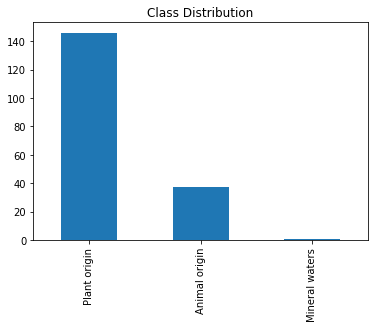

In [ ]:
dataset['Class'].value_counts().plot(kind = 'bar', title = 'Class Distribution')

In [ ]:
dataset['Type'].value_counts().head()

Vegetable                 64
Fruit                     34
Cereal grain and pulse    21
Aquatic animal            14
Nut and seed              12
Name: Type, dtype: int64

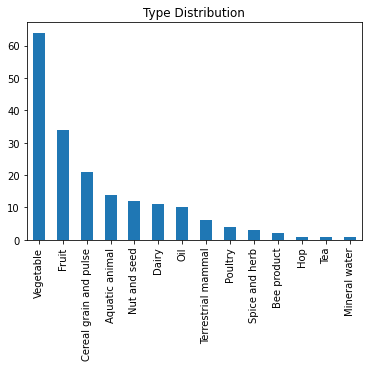

In [ ]:
dataset['Type'].value_counts().plot(kind = 'bar', title = 'Type Distribution')

In [ ]:
dataset['Group'].value_counts().head()

Cruciferous vegetable    15
Pulse                    13
Fish                     12
Dairy                    11
Oil seed                 10
Name: Group, dtype: int64

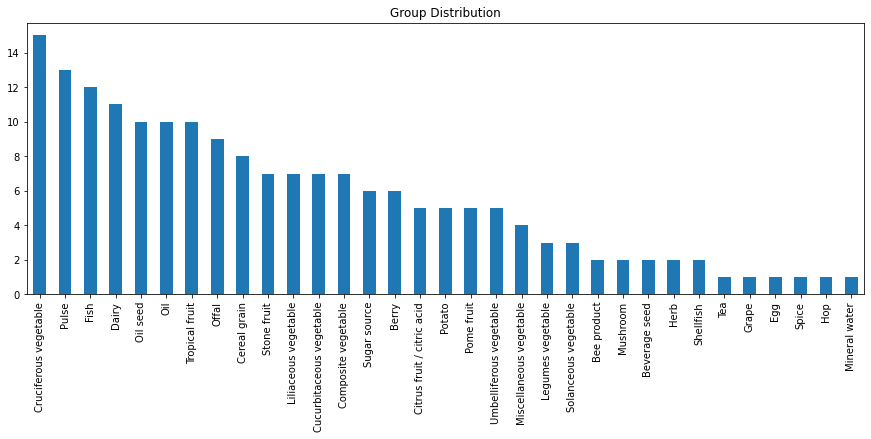

In [ ]:
dataset['Group'].value_counts().plot(kind = 'bar', figsize = (15, 5), title = 'Group Distribution')

In [ ]:
dataset['Allergy'].value_counts().head()

Legume Allergy                        14
Oral Allergy Syndrome                 13
Fish Allergy                          12
Milk allergy / Lactose intolerance    11
Cruciferous Allergy                    9
Name: Allergy, dtype: int64

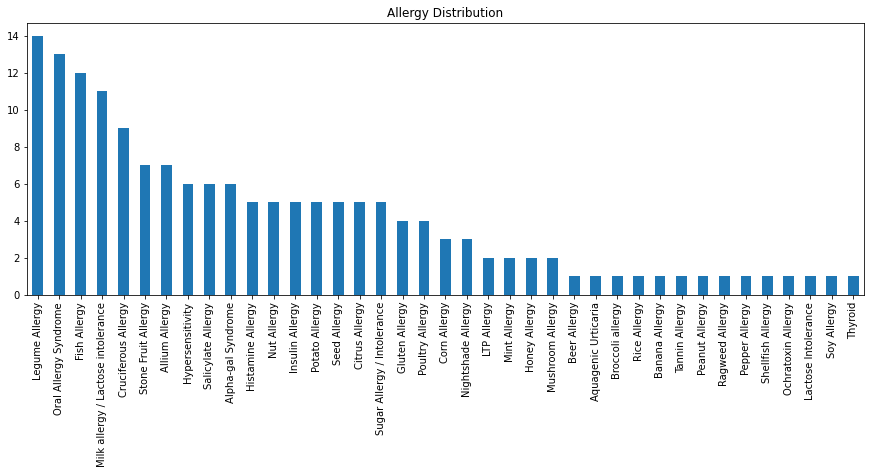

In [ ]:
dataset['Allergy'].value_counts().plot(kind = 'bar', figsize = (15, 5), title = 'Allergy Distribution')

## Allergen to Allergy

In [ ]:
"""
This is where the following things happen:
1. We get the text input from tesserract.
2. We search the text recieved in the 'Food' column of our dataset.
3. We return the corresponding 'Allergy' from the dataset.

TO-DO NOW:
1. Create an array or a list 'input' to store incoming text.
2. Write an algorithm to take each element of 'input' and search it in 'Food', find corresponding 'Allergy', and return it.

TO-DO FOR LATER:
2. Comments and documentation for everything.
3. Feeding output to website. How.
"""

## Tesseract Section

### Image

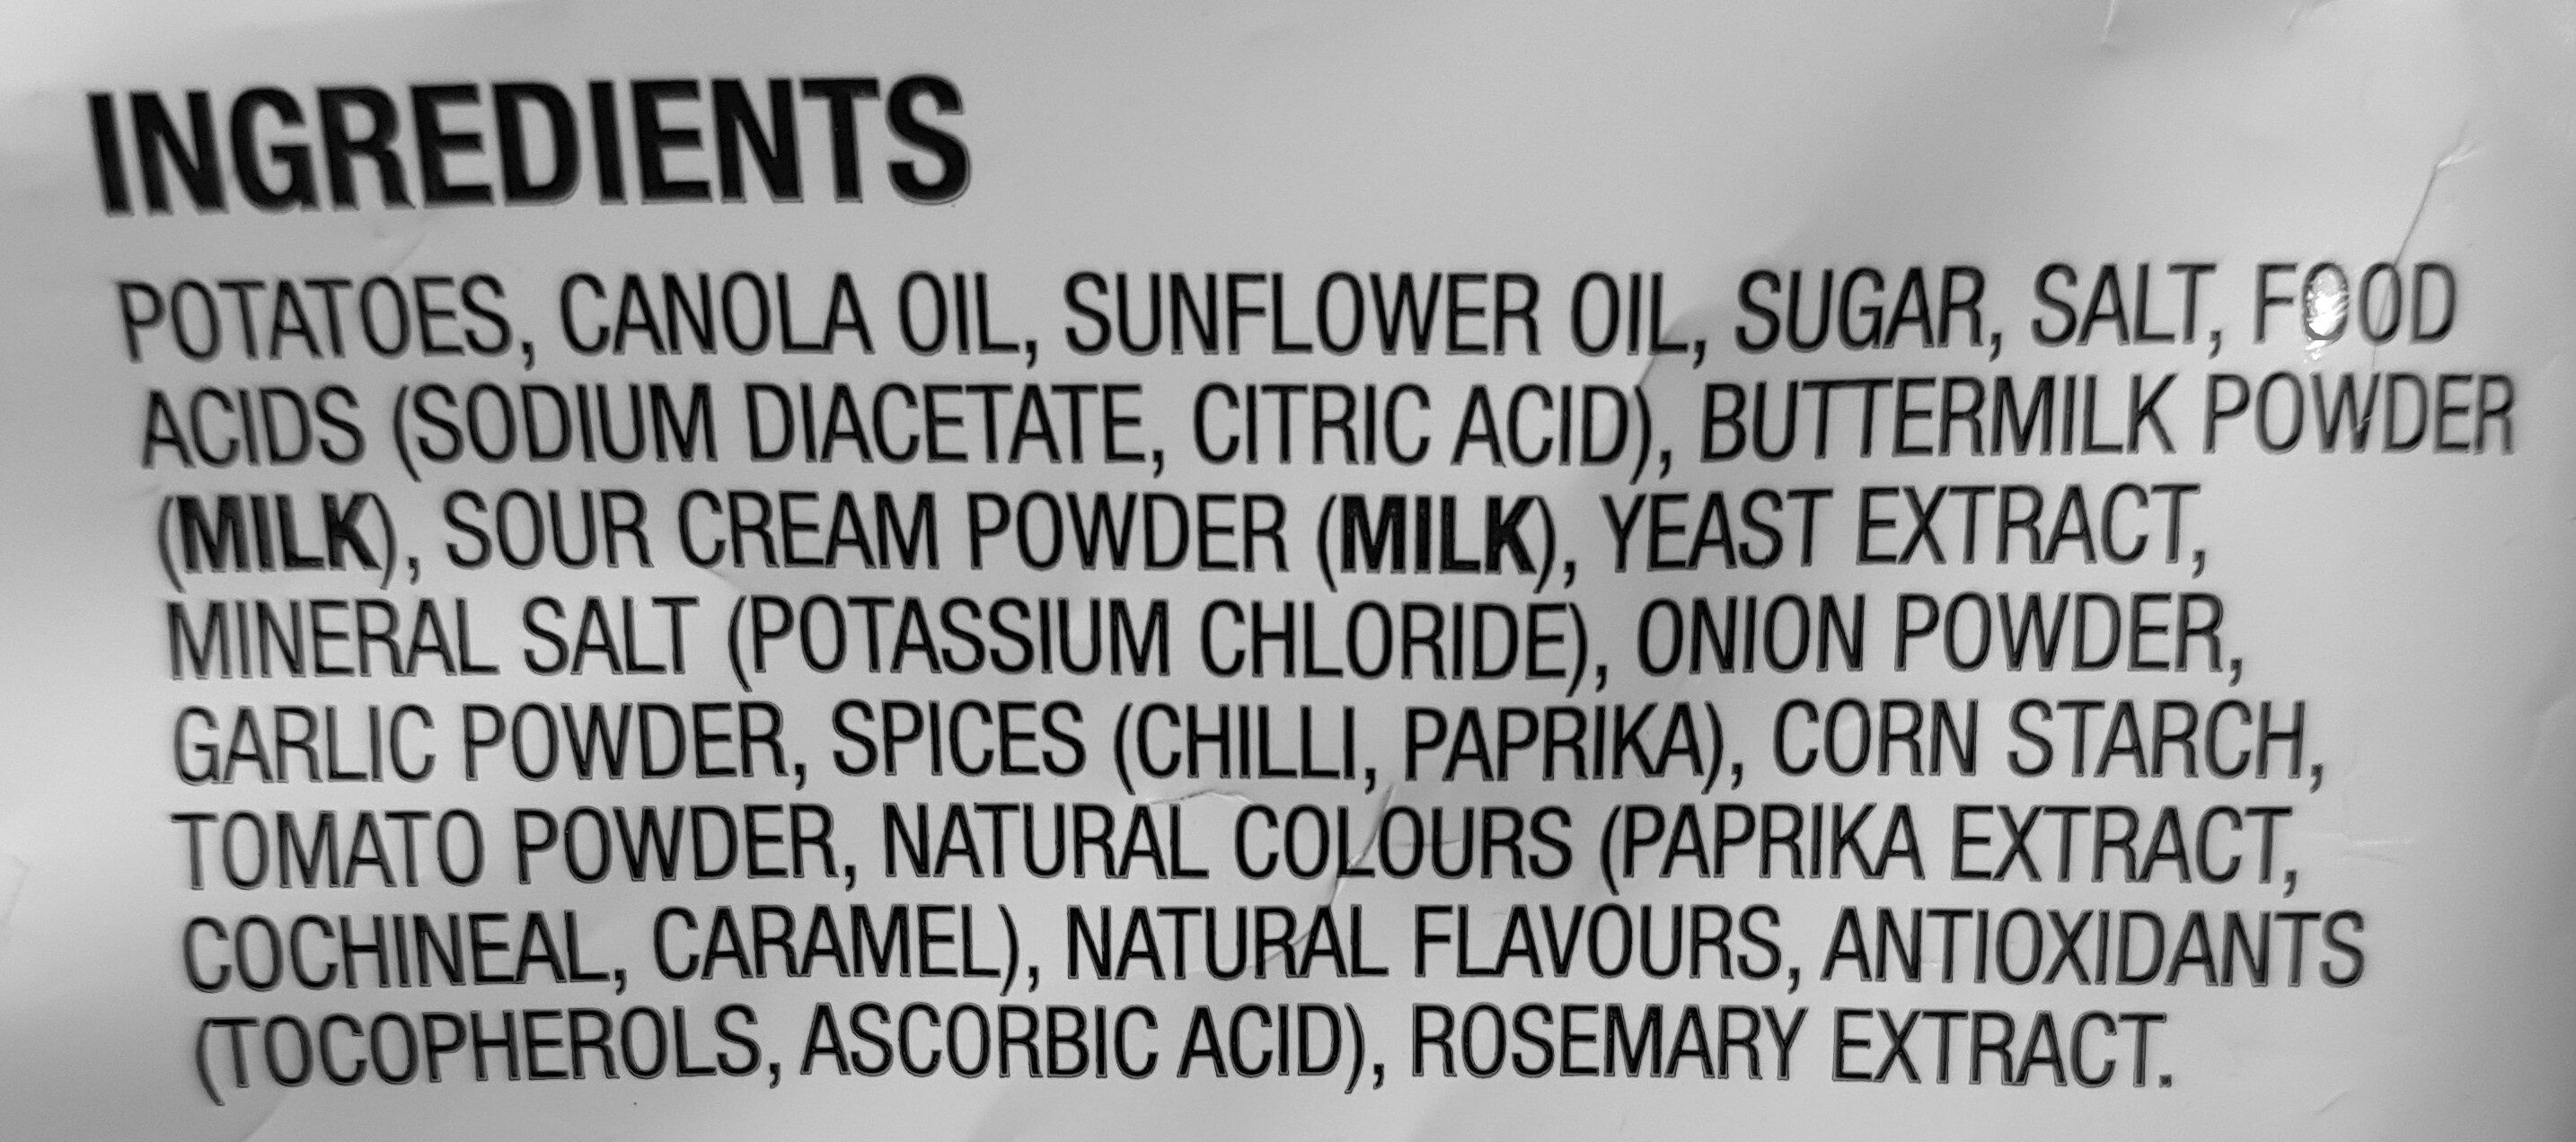

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/drive/My Drive/data/chips.jpg', 0)
cv2_imshow(img)

### Extracting Text from Image

In [ ]:
import pytesseract

pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
raw_text = pytesseract.image_to_string(img)
raw_text

'INGREDIENTS\n\nPOTATOES, CANOLA OIL, SUNFLOWER OIL, SUGAR, SALT, FOOD\nACIDS (SODIUM DIACETATE, CITRIC ACID), BUTTERMILK POWDER\n(MILK), SOUR CREAM POWDER (MILK), YEAST EXTRACT,\nMINERAL SALT (POTASSIUM CHLORIDE), ONION POWDER,\n\nGARLIC POWDER, SPICES (CHILLI, PAPRIKA), CORN STARCH,\nTOMATO POWDER, NATURAL COLOURS (PAPRIKA EXTRACT,\nCOCHINEAL, CARAMEL), NATURAL FLAVOURS, ANTIOXIDANTS\n(TOCOPHEROLS, ASCORBIC ACID), ROSEMARY EXTRACT.\n\x0c'

### Cleaning the obtained text

In [ ]:
import re
raw_text_modified = re.sub('(ingredients)|([\/\n\.:])| ([\d]*)', ' ', raw_text.lower()).strip()
raw_text_modified

'potatoes, canola oil, sunflower oil, sugar, salt, food acids (sodium diacetate, citric acid), buttermilk powder (milk), sour cream powder (milk), yeast extract, mineral salt (potassium chloride), onion powder,  garlic powder, spices (chilli, paprika), corn starch, tomato powder, natural colours (paprika extract, cochineal, caramel), natural flavours, antioxidants (tocopherols, ascorbic acid), rosemary extract'

In [ ]:
import spacy
import nltk
from nltk.corpus import words

nlp = spacy.load('en')
doc = nlp(raw_text_modified)

# Lemmatizing the ingredients
ingredients_list = sorted(list(set([token.lemma_ for token in doc if not token.is_punct and not token.is_stop and not token.is_space and str(token.lemma_) in words.words()])))
print(ingredients_list)

['acid', 'antioxidant', 'ascorbic', 'buttermilk', 'caramel', 'chloride', 'citric', 'cochineal', 'colour', 'corn', 'cream', 'diacetate', 'extract', 'flavour', 'food', 'garlic', 'milk', 'mineral', 'natural', 'oil', 'onion', 'paprika', 'potassium', 'potato', 'powder', 'rosemary', 'salt', 'sodium', 'sour', 'spice', 'starch', 'sugar', 'tocopherol', 'tomato', 'yeast']


We now have a list of ingredients which we will further use.

### Searching the dataset for ingredients obtained

In [ ]:
data = pd.read_csv('FoodData.csv')

# Lowercasing the data
data = data.apply(lambda x: x.astype(str).str.lower())

data.head()

,Class,Type,Group,Food,Allergy
0,plant origin,nut and seed,oil seed,almond,nut allergy
1,plant origin,fruit,pome fruit,apple,oral allergy syndrome
2,plant origin,fruit,stone fruit,apricot,stone fruit allergy
3,plant origin,vegetable,composite vegetable,artichoke,insulin allergy
4,plant origin,vegetable,liliaceous vegetable,asparagus,allium allergy


In [ ]:
# We have pre-sorted the 'Food' column in ascending order to be able to apply binary search for optimization
def search(ingredient, food_column):
  low = 0
  high = len(food_column) - 1
  while (low <= high): 
      mid = (low + high) // 2
  
      if (ingredient == food_column[mid] or ingredient in food_column[mid]):
          return mid
      elif (ingredient < food_column[mid]):
          high = mid - 1
      else:
          low = mid + 1

  return -1

In [ ]:
import itertools

ingredients_list_copy = ingredients_list[:]
food_allergy_mapping = {}

# Storing the values of 'Food' column in a list
food_column = data['Food'].values.tolist()

def search_database(ingredients_list, food_column):
  index = 0
  while index < len(ingredients_list):
      ingredient = ingredients_list[index]
      res = search(ingredient, food_column)
      if res != -1:
        food_allergy_mapping[ingredient] = data['Allergy'][res]
        ingredients_list.remove(ingredient)
      
      index += 1

# Generating permutations of size two of the ingredients
ingredients_list_copy = list(itertools.permutations(ingredients_list, 2))
for index in range(len(ingredients_list_copy)):
  ingredients_list_copy[index] = ' '.join(ingredients_list_copy[index])

# Searching for permutations of ingredients first
search_database(ingredients_list_copy, food_column)
# Searching for individual ingredients
search_database(ingredients_list, food_column)

food_allergy_mapping

{'buttermilk': 'milk allergy / lactose intolerance',
 'corn': 'corn allergy',
 'corn oil': 'nan',
 'garlic': 'allium allergy',
 'mineral': 'aquagenic urticaria',
 'onion': 'allium allergy',
 'potato': 'potato allergy',
 'sour': 'milk allergy / lactose intolerance',
 'sour cream': 'milk allergy / lactose intolerance',
 'sugar': 'sugar allergy / intolerance',
 'tomato': 'nightshade allergy'}

### Storing the Food-Allergy Dictionary in a JSON format

In [ ]:
import json

json_output = json.dumps(food_allergy_mapping)
json_output

'{"corn oil": "nan", "sour cream": "milk allergy / lactose intolerance", "buttermilk": "milk allergy / lactose intolerance", "corn": "corn allergy", "garlic": "allium allergy", "mineral": "aquagenic urticaria", "onion": "allium allergy", "potato": "potato allergy", "sour": "milk allergy / lactose intolerance", "sugar": "sugar allergy / intolerance", "tomato": "nightshade allergy"}'